In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [2]:
data = pd.read_csv('./data/zomato_df_final_data.csv')

In [3]:
data.head(5)

,address,cost,cuisine,lat,link,lng,phone,rating_number,rating_text,subzone,title,type,votes,groupon,color,cost_2,cuisine_color
0,"371A Pitt Street, CBD, Sydney",50.0,"['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']",-33.876059,https://www.zomato.com/sydney/sydney-madang-cbd,151.207605,02 8318 0406,4.0,Very Good,CBD,Sydney Madang,['Casual Dining'],1311.0,False,#e15307,5.243902,#6f706b
1,"Shop 7A, 2 Huntley Street, Alexandria, Sydney",80.0,"['Cafe', 'Coffee and Tea', 'Salad', 'Poké']",-33.910999,https://www.zomato.com/sydney/the-grounds-of-a...,151.193793,02 9699 2225,4.6,Excellent,"The Grounds of Alexandria, Alexandria",The Grounds of Alexandria Cafe,['Café'],3236.0,False,#9c3203,7.560976,#6f706b
2,"Level G, The Darling at the Star, 80 Pyrmont ...",120.0,['Japanese'],-33.867971,https://www.zomato.com/sydney/sokyo-pyrmont,151.195210,1800 700 700,4.9,Excellent,"The Star, Pyrmont",Sokyo,['Fine Dining'],1227.0,False,#7f2704,10.650407,#6f706b
3,"Sydney Opera House, Bennelong Point, Circular...",270.0,['Modern Australian'],-33.856784,https://www.zomato.com/sydney/bennelong-restau...,151.215297,02 9240 8000,4.9,Excellent,Circular Quay,Bennelong Restaurant,"['Fine Dining', 'Bar']",278.0,False,#7f2704,22.235772,#4186f4
4,"20 Campbell Street, Chinatown, Sydney",55.0,"['Thai', 'Salad']",-33.879035,https://www.zomato.com/sydney/chat-thai-chinatown,151.206409,02 8317 4811,4.5,Excellent,Chinatown,Chat Thai,['Casual Dining'],2150.0,False,#a83703,5.630081,#6f706b


##### How many unique cuisines are served by Sydney restaurants?

In [4]:
combined_cuisine = data['cuisine'].explode().tolist() 

# Step 1: Convert strings to actual lists using ast.literal_eval
converted_lists = [ast.literal_eval(item) for item in combined_cuisine]

# Step 2: Flatten the lists into one single list
flattened_list = [item for sublist in converted_lists for item in sublist]

# Step 3: Find unique elements using set
unique_elements = set(flattened_list)

# Step 4: Get the count of unique elements
unique_count = len(unique_elements)

# Output the result
print(f"Unique elements: {unique_elements}")
print(f"Unique count: {unique_count}")

Unique elements: {'Meat Pie', 'Israeli', 'Beverages', 'Yum Cha', 'Mediterranean', 'Taiwanese', 'Iraqi', 'Street Food', 'Juices', 'Indonesian', 'Deli', 'Pakistani', 'Swiss', 'Kebab', 'Shanghai', 'Mexican', 'Hungarian', 'Vietnamese', 'Eastern European', 'Japanese', 'Dutch', 'Syrian', 'Falafel', 'Italian', 'Moroccan', 'Crepes', 'African', 'Hot Pot', 'Pho', 'Brasserie', 'Portuguese', 'Russian', 'Desserts', 'Poké', 'Belgian', 'South African', 'Iranian', 'Polish', 'Bubble Tea', 'Healthy Food', 'Seafood', 'Jewish', 'Caribbean', 'Ice Cream', 'Hawaiian', 'Cafe', 'Filipino', 'Salad', 'Pizza', 'Tea', 'Contemporary', 'Modern Australian', 'Malaysian', 'Indian', 'British', 'Swedish', 'Modern European', 'Sushi', 'Patisserie', 'American', 'Finger Food', 'Nepalese', 'Burger', 'Scandinavian', 'Thai', 'Mongolian', 'Bakery', 'Teppanyaki', 'Latin American', 'Teriyaki', 'Oriental', 'German', 'Irish', 'Egyptian', 'Burmese', 'Ukrainian', 'Vegetarian', 'Kiwi', 'Colombian', 'Satay', 'Peruvian', 'Spanish', 'Sri 

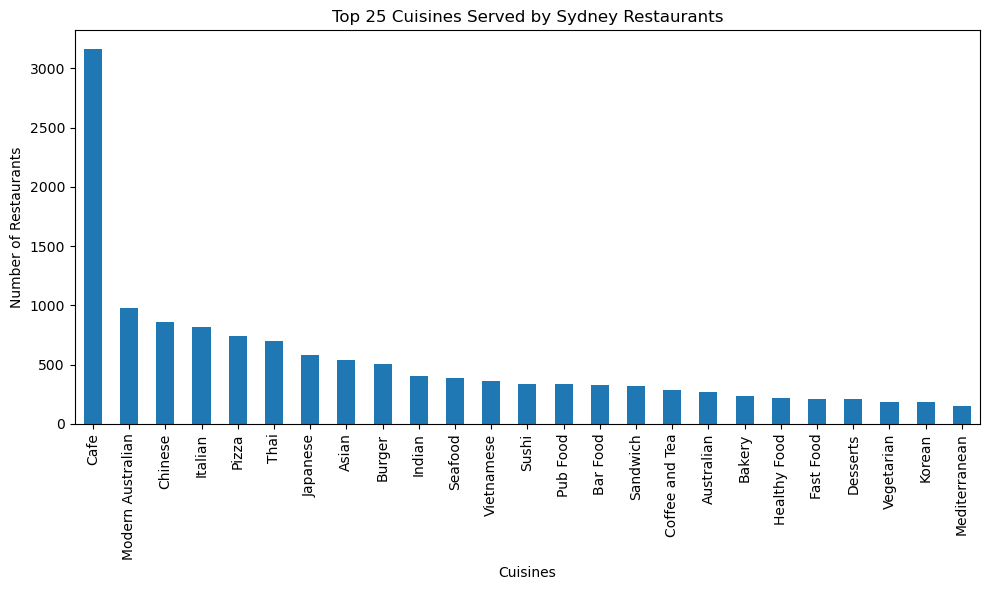

In [5]:
# Assuming 'data' is your dataframe and 'cuisine' is the column with lists of cuisines
# First, process the 'cuisine' column as you did earlier to split and clean the data
data['cuisine_processed'] = data['cuisine'].str.strip("[]").str.replace("'", "").str.split(",")

# Flatten the list of cuisines
flattened_list = data['cuisine_processed'].explode().str.strip()

data.drop(columns='cuisine_processed',axis=1)
# Get the value counts of the cuisines
cuisine_counts = flattened_list.value_counts()

# Now you can proceed with plotting the top 25 cuisines or filter as needed
top_25_cuisine_counts = cuisine_counts.head(25)

# Plotting the top 25 cuisines
plt.figure(figsize=(10,6))
top_25_cuisine_counts.plot(kind='bar')
plt.title('Top 25 Cuisines Served by Sydney Restaurants')
plt.xlabel('Cuisines')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


##### which suburbs (top 3) have the highest number of restaurants?

In [6]:
# Group the data by 'subzone' (suburb) and count the number of restaurants in each
top_suburbs = data['subzone'].value_counts().head(3)

# Display the top 3 suburbs with the highest number of restaurants
top_suburbs


subzone
CBD            476
Surry Hills    260
Parramatta     225
Name: count, dtype: int64

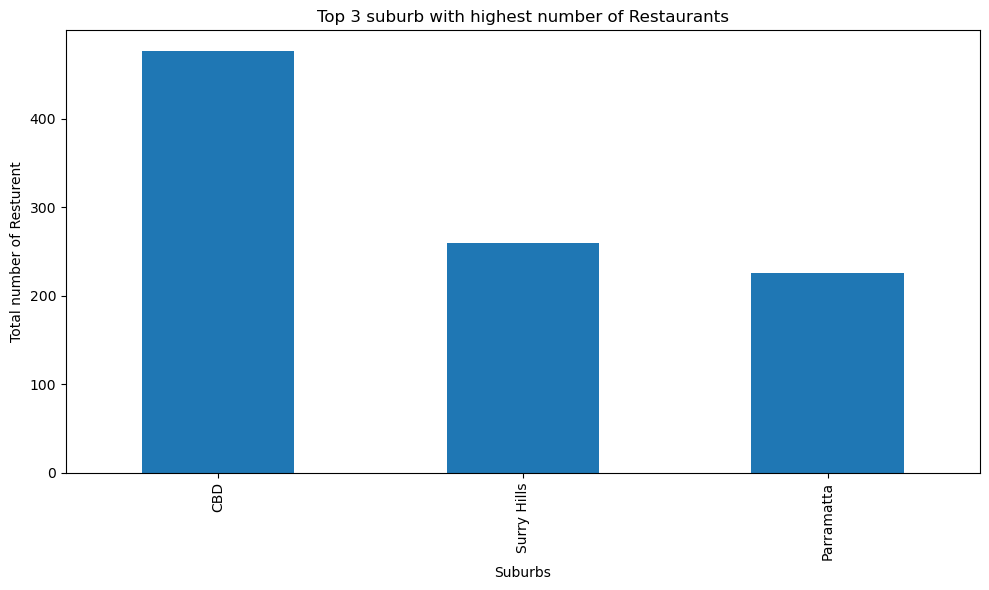

In [7]:
# Plotting the top 25 cuisines
plt.figure(figsize=(10,6))
top_suburbs.plot(kind='bar')
plt.title('Top 3 suburb with highest number of Restaurants')
plt.xlabel('Suburbs')
plt.ylabel('Total number of Resturent')
plt.tight_layout()
plt.show()

##### Resturants with rating vs price

In [8]:
# Calculate the mean cost for each rating category
mean_cost_by_rating = data.groupby('rating_text')['cost'].mean()
print(mean_cost_by_rating)

rating_text
Average       51.021267
Excellent    101.666667
Good          59.528114
Poor          55.845771
Very Good     71.515810
Name: cost, dtype: float64


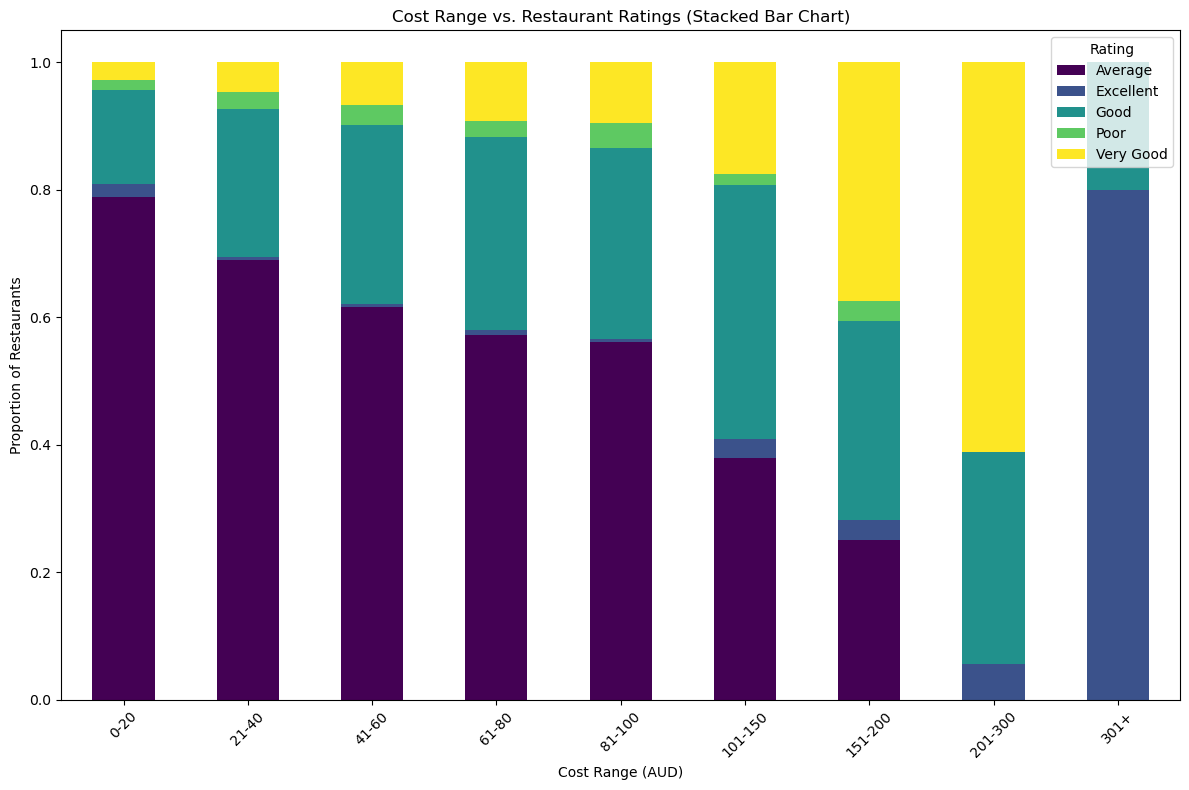

In [9]:
# Create cost bins and categorize the cost into ranges
bins = [0, 20, 40, 60, 80, 100, 150, 200, 300, 500]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100', '101-150', '151-200', '201-300', '301+']
data['cost_bins'] = pd.cut(data['cost'], bins=bins, labels=labels)

# Group by rating_text and cost_bins
stacked_data = pd.crosstab(data['cost_bins'], data['rating_text'], normalize='index')

# Plot the stacked bar chart
stacked_data.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Cost Range vs. Restaurant Ratings (Stacked Bar Chart)')
plt.xlabel('Cost Range (AUD)')
plt.ylabel('Proportion of Restaurants')
plt.legend(title='Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


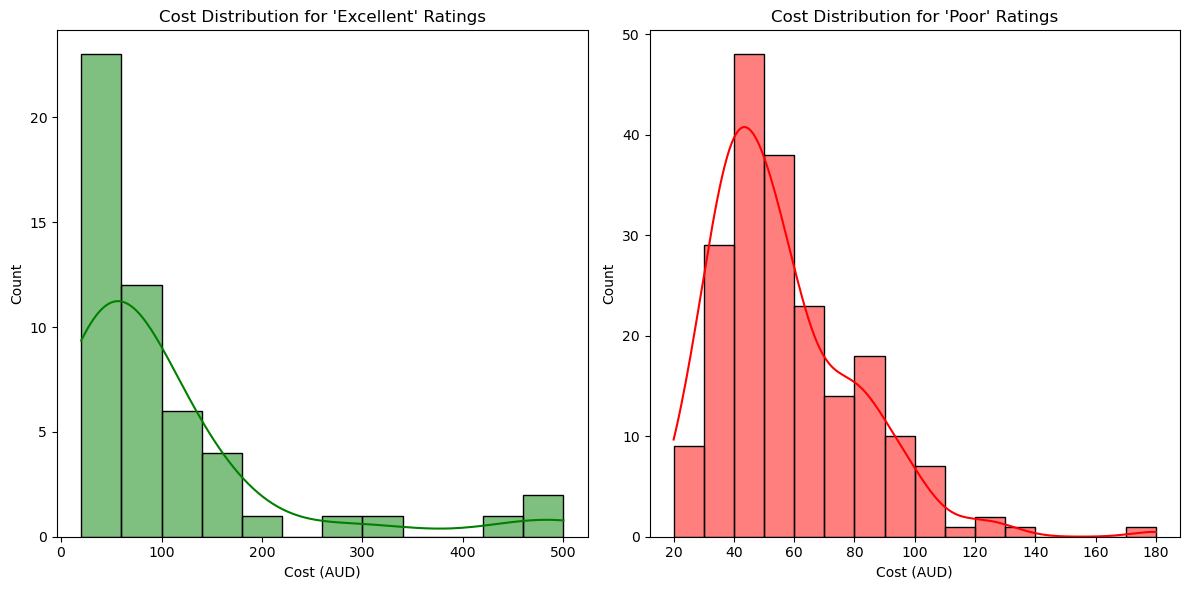

In [10]:
import seaborn as sns
plt.figure(figsize=(12, 6))

# Histogram for "Excellent" rated restaurants
plt.subplot(1, 2, 1)
sns.histplot(data[data['rating_text'] == 'Excellent']['cost'], kde=True, color='green')
plt.title("Cost Distribution for 'Excellent' Ratings")
plt.xlabel("Cost (AUD)")

# Histogram for "Poor" rated restaurants
plt.subplot(1, 2, 2)
sns.histplot(data[data['rating_text'] == 'Poor']['cost'], kde=True, color='red')
plt.title("Cost Distribution for 'Poor' Ratings")
plt.xlabel("Cost (AUD)")

plt.tight_layout()
plt.show()


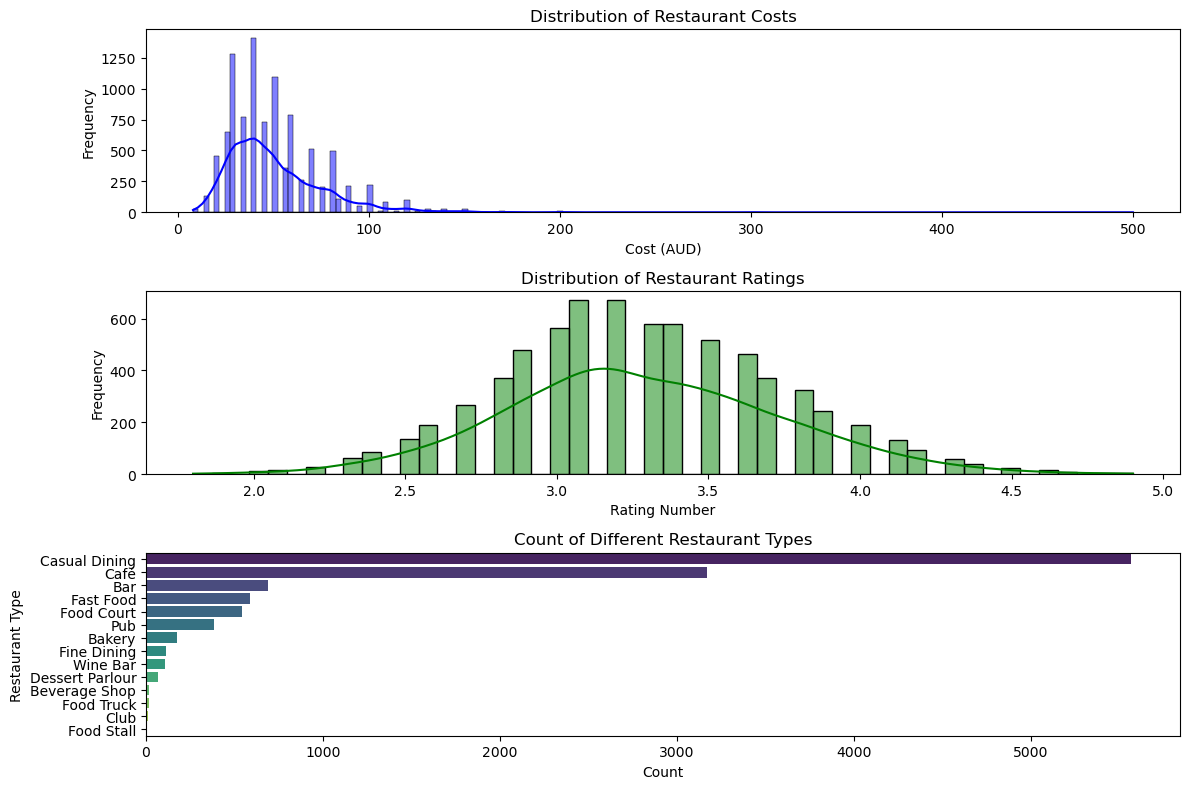

Cost Description:
count    10154.000000
mean        51.153240
std         27.799485
min          8.000000
25%         30.000000
50%         45.000000
75%         60.000000
max        500.000000
Name: cost, dtype: float64

Rating Description:
count    7184.000000
mean        3.283672
std         0.454580
min         1.800000
25%         3.000000
50%         3.300000
75%         3.600000
max         4.900000
Name: rating_number, dtype: float64


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Descriptive analysis of the 'cost', 'rating_number', and 'type' columns

# Setting the figure size for all plots
plt.figure(figsize=(12, 8))

# 1. Histogram for 'Cost'
plt.subplot(3, 1, 1)
sns.histplot(data['cost'], kde=True, color='blue')
plt.title('Distribution of Restaurant Costs')
plt.xlabel('Cost (AUD)')
plt.ylabel('Frequency')

# 2. Histogram for 'Rating Number'
plt.subplot(3, 1, 2)
sns.histplot(data['rating_number'], kde=True, color='green')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating Number')
plt.ylabel('Frequency')

# 3. Bar plot for 'Type' - analyzing the different types of restaurants
plt.subplot(3, 1, 3)
type_data = data['type'].dropna().apply(lambda x: eval(x)).explode()
sns.countplot(y=type_data, order=type_data.value_counts().index, palette='viridis')
plt.title('Count of Different Restaurant Types')
plt.xlabel('Count')
plt.ylabel('Restaurant Type')

plt.tight_layout()
plt.show()

# Descriptive statistics for Cost and Rating Number
cost_description = data['cost'].describe()
rating_description = data['rating_number'].describe()

print("Cost Description:")
print(cost_description)
print("\nRating Description:")
print(rating_description)


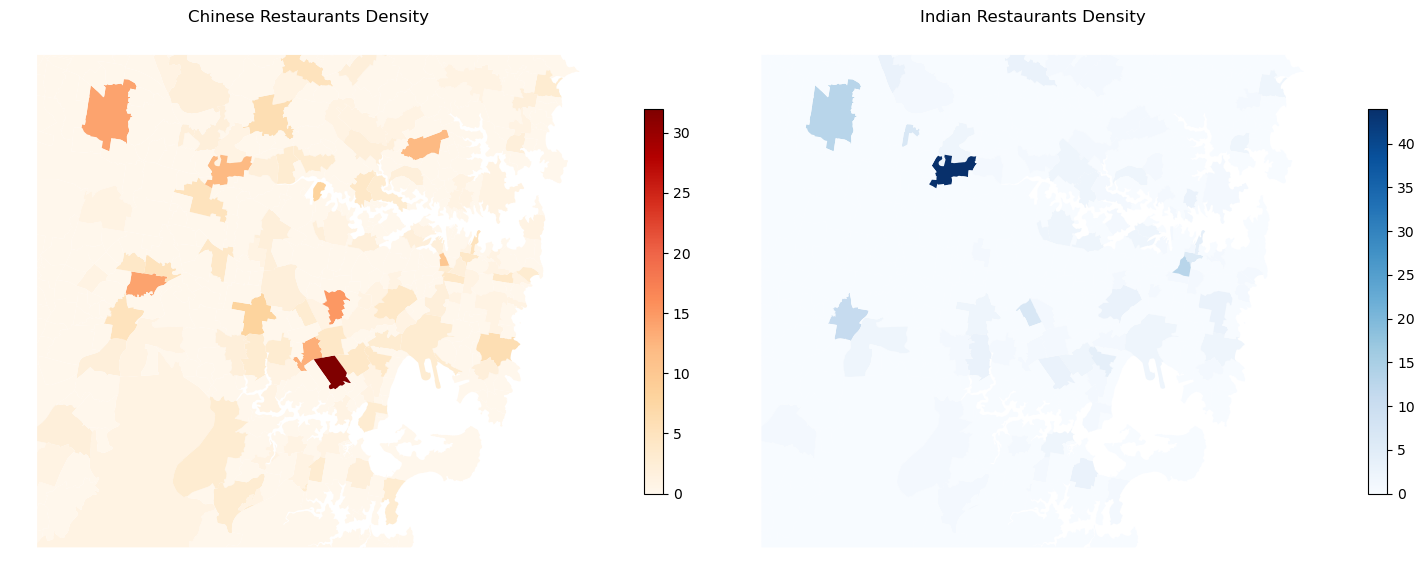

In [12]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

def show_multiple_cuisine_density_maps(cuisines, geojson_file='./data/sydney.geojson', zomato_data='./data/zomato_df_final_data.csv'):
    # Load GeoJSON into a GeoDataFrame
    sydney_suburbs = gpd.read_file(geojson_file)

    # Load Zomato dataset
    zomato_df = pd.read_csv(zomato_data)

    # Create GeoDataFrame for Zomato data using latitude and longitude
    zomato_geo = gpd.GeoDataFrame(zomato_df, geometry=gpd.points_from_xy(zomato_df.lng, zomato_df.lat), crs="EPSG:4326")

    # Spatial join to assign each restaurant to the corresponding suburb
    restaurants_in_suburbs = gpd.sjoin(zomato_geo, sydney_suburbs, how="inner", predicate="within")

    # Clean cuisine column by removing brackets and unnecessary characters
    restaurants_in_suburbs['cuisine'] = restaurants_in_suburbs['cuisine'].str.strip("[]").str.replace("'", "")

    # Prepare subplots to display multiple cuisine density maps
    fig, axes = plt.subplots(1, len(cuisines), figsize=(15, 8))  # Adjust figure size as needed

    # Loop through each cuisine and plot its density map
    for i, cuisine in enumerate(cuisines):
        # Filter restaurants that serve the desired cuisine
        cuisine_restaurants = restaurants_in_suburbs[restaurants_in_suburbs['cuisine'].str.contains(cuisine, case=False)]
        
        # Group by suburb and count the restaurants serving the specified cuisine
        cuisine_density = cuisine_restaurants.groupby('subzone').size().reset_index(name='count')

        # Merge the cuisine density data with the suburb GeoDataFrame
        sydney_suburbs_cuisine = sydney_suburbs.merge(cuisine_density, how="left", left_on="SSC_NAME", right_on="subzone")

        # Fill NaN values with 0 (no restaurants serving this cuisine in the suburb)
        sydney_suburbs_cuisine['count'] = sydney_suburbs_cuisine['count'].fillna(0)

        # Plot the suburb map, color-coded by the number of restaurants serving the cuisine
        sydney_suburbs_cuisine.plot(column='count', ax=axes[i], legend=True, cmap='OrRd' if i == 0 else 'Blues', legend_kwds={'shrink': 0.5})
        axes[i].set_title(f'{cuisine} Restaurants Density')
        axes[i].set_axis_off()  # Remove the axis for clean visualization

    plt.tight_layout()  # Adjust the layout for better spacing
    plt.show()

# Example usage
cuisines_to_compare = ['Chinese', 'Indian']
show_multiple_cuisine_density_maps(cuisines_to_compare)


In [13]:
data = data.drop(['cuisine_processed','cost_bins'], axis=1)

## Part B

In [14]:
#Explore Data Anaysis 
# data shape
print(data.shape)
# column names
print(data.columns)

(10500, 17)
Index(['address', 'cost', 'cuisine', 'lat', 'link', 'lng', 'phone',
       'rating_number', 'rating_text', 'subzone', 'title', 'type', 'votes',
       'groupon', 'color', 'cost_2', 'cuisine_color'],
      dtype='object')


In [15]:
# summary of dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        10500 non-null  object 
 1   cost           10154 non-null  float64
 2   cuisine        10500 non-null  object 
 3   lat            10308 non-null  float64
 4   link           10500 non-null  object 
 5   lng            10308 non-null  float64
 6   phone          10500 non-null  object 
 7   rating_number  7184 non-null   float64
 8   rating_text    7184 non-null   object 
 9   subzone        10500 non-null  object 
 10  title          10500 non-null  object 
 11  type           10452 non-null  object 
 12  votes          7184 non-null   float64
 13  groupon        10500 non-null  bool   
 14  color          10500 non-null  object 
 15  cost_2         10154 non-null  float64
 16  cuisine_color  10500 non-null  object 
dtypes: bool(1), float64(6), object(10)
memory usage: 1

In [16]:
data = data.drop(['address','lat','lng','phone','link','title','color','type','cost_2','cuisine_color','groupon'], axis=1)

In [17]:
data.columns

Index(['cost', 'cuisine', 'rating_number', 'rating_text', 'subzone', 'votes'], dtype='object')

In [18]:
categorical = [var for var in data.columns if data[var].dtype=='O']
print("There are {} categorical variables\n".format(len(categorical)))
print("The categorical variables are: ", categorical)

There are 3 categorical variables

The categorical variables are:  ['cuisine', 'rating_text', 'subzone']


In [19]:
# check if the target variable has any na/null values
print(data.shape)
data = data[data['rating_number'].notna()]
print(data.shape)

(10500, 6)
(7184, 6)


### Explore categorical variables

In [20]:
# a function to explore each of the categorical variables
def explore_categorical(df, var):
    # check if the variable has any missing values
    print('********** missing values **********')
    print(df[var].isnull().sum())
    print('********** Labels **********')
    # check unique lables in variable
    print(df[var].unique())
    print('********** frequency **********')
    # check frequency of each variable
    print(df[var].value_counts())

In [21]:
explore_categorical(data, 'cuisine')

********** missing values **********
0
********** Labels **********
["['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']"
 "['Cafe', 'Coffee and Tea', 'Salad', 'Poké']" "['Japanese']" ...
 "['American', 'Coffee and Tea']" "['Vietnamese', 'Cambodian']"
 "['Fast Food', 'Burger', 'Coffee and Tea']"]
********** frequency **********
cuisine
['Cafe']                                                   1004
['Thai']                                                    420
['Chinese']                                                 284
['Modern Australian']                                       250
['Italian', 'Pizza']                                        217
                                                           ... 
['Pizza', 'Seafood', 'Modern Australian', 'Vegetarian']       1
['BBQ', 'Chinese', 'Hot Pot']                                 1
['Bakery', 'German']                                          1
['Steak', 'Modern Australian', 'Bar Food']                    1
['Fast Food', 'Burger', 'Coffe

In [22]:
explore_categorical(data, 'subzone')

********** missing values **********
0
********** Labels **********
['CBD' 'The Grounds of Alexandria, Alexandria' 'The Star, Pyrmont'
 'Circular Quay' 'Chinatown' 'Kensington Street, Chippendale'
 'Establishment, CBD' 'Surry Hills' 'The Rocks Centre, The Rocks '
 'Westfield Pitt Street Mall, CBD' 'The Rocks'
 'World Square Shopping Centre, CBD' 'Darling Park, Darling Harbour'
 'SkyView Shopping Plaza, CBD' 'Parramatta' 'Pyrmont'
 'Harbourside Shopping Centre, Darling Harbour' 'Ivy, CBD'
 'Regent Place Arcade, CBD' 'Newtown' 'The Galeries, CBD' 'Granville'
 'Potts Point' 'Woolloomooloo' 'Darling Harbour' 'Strathfield'
 'Darlinghurst' 'Wintergarden, CBD' 'Alexandria' 'Crows Nest'
 'Harbour Plaza, Chinatown' 'Westfield Chatswood, Chatswood' 'Ashfield'
 'Haberfield' 'Annandale' 'Chatswood' 'Chatswood Interchange, Chatswood'
 'The Strand Arcade, CBD' 'Glebe' 'Enmore' 'Redfern' 'Bronte'
 'Chippendale' 'Cabramatta' 'Rhodes' 'Icebergs, Bondi Beach' 'Bondi Beach'
 'Burwood' 'Macquarie Park' 'E

### Explore Numerical Variables


In [23]:
data.head()

,cost,cuisine,rating_number,rating_text,subzone,votes
0,50.0,"['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']",4.0,Very Good,CBD,1311.0
1,80.0,"['Cafe', 'Coffee and Tea', 'Salad', 'Poké']",4.6,Excellent,"The Grounds of Alexandria, Alexandria",3236.0
2,120.0,['Japanese'],4.9,Excellent,"The Star, Pyrmont",1227.0
3,270.0,['Modern Australian'],4.9,Excellent,Circular Quay,278.0
4,55.0,"['Thai', 'Salad']",4.5,Excellent,Chinatown,2150.0


In [24]:
# find numerical variables
numericals = [var for var in data.columns if data[var].dtype != 'O']
print('There are {} numerical variables\n'.format(len(numericals)))
print('The numerical variables are :', numericals)
data[numericals].head()

There are 3 numerical variables

The numerical variables are : ['cost', 'rating_number', 'votes']


,cost,rating_number,votes
0,50.0,4.0,1311.0
1,80.0,4.6,3236.0
2,120.0,4.9,1227.0
3,270.0,4.9,278.0
4,55.0,4.5,2150.0


In [25]:
# Explore problems within numerical variables
# check missing values in numerical variables
data[numericals].isnull().sum()

cost             103
rating_number      0
votes              0
dtype: int64

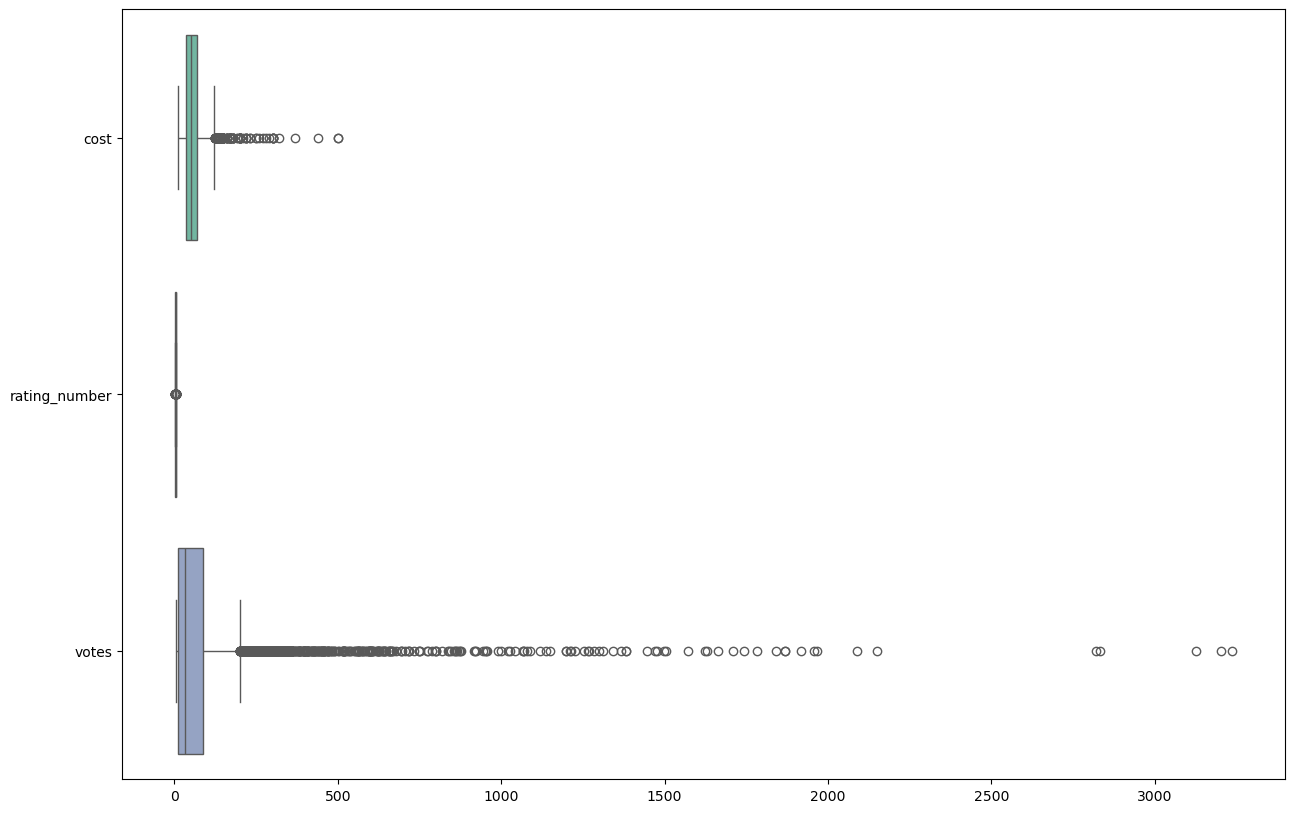

In [26]:
# we can also use seaborn library to plot elegant ones
df_custom = data[['cost', 'rating_number', 'votes']]
import seaborn as sns
plt.figure(figsize=(15,10))
ax = sns.boxplot(data=df_custom, orient="h", palette="Set2")

Text(0, 0.5, 'Rating')

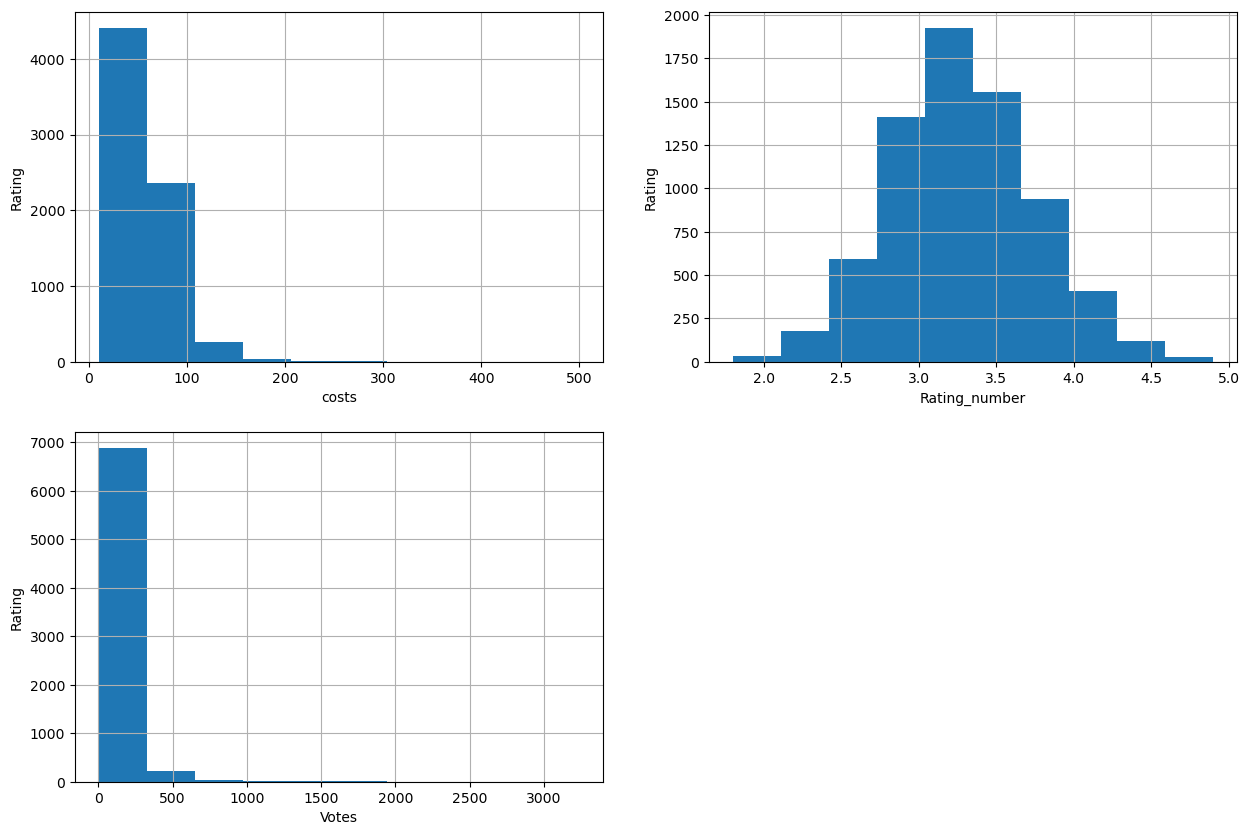

In [27]:
# plot histogram to check distribution
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = data['cost'].hist(bins=10)
fig.set_xlabel('costs')
fig.set_ylabel('Rating')


plt.subplot(2, 2, 2)
fig = data.rating_number.hist(bins=10)
fig.set_xlabel('Rating_number')
fig.set_ylabel('Rating')


plt.subplot(2, 2, 3)
fig = data.votes.hist(bins=10)
fig.set_xlabel('Votes')
fig.set_ylabel('Rating')

In [28]:
final_data = data.copy()

In [29]:
final_data.head()

,cost,cuisine,rating_number,rating_text,subzone,votes
0,50.0,"['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']",4.0,Very Good,CBD,1311.0
1,80.0,"['Cafe', 'Coffee and Tea', 'Salad', 'Poké']",4.6,Excellent,"The Grounds of Alexandria, Alexandria",3236.0
2,120.0,['Japanese'],4.9,Excellent,"The Star, Pyrmont",1227.0
3,270.0,['Modern Australian'],4.9,Excellent,Circular Quay,278.0
4,55.0,"['Thai', 'Salad']",4.5,Excellent,Chinatown,2150.0


In [30]:
final_data.shape

(7184, 6)

In [31]:
 # Drop duplicates
final_data = final_data.drop_duplicates(inplace=False)

In [32]:
final_data.shape

(7181, 6)

In [33]:
 # Handle missing values
final_data['cost'].fillna(final_data['cost'].median(), inplace=True)

In [34]:
final_data.dropna(subset=['rating_number', 'votes'], inplace=True)

In [35]:
final_data.head()

,cost,cuisine,rating_number,rating_text,subzone,votes
0,50.0,"['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']",4.0,Very Good,CBD,1311.0
1,80.0,"['Cafe', 'Coffee and Tea', 'Salad', 'Poké']",4.6,Excellent,"The Grounds of Alexandria, Alexandria",3236.0
2,120.0,['Japanese'],4.9,Excellent,"The Star, Pyrmont",1227.0
3,270.0,['Modern Australian'],4.9,Excellent,Circular Quay,278.0
4,55.0,"['Thai', 'Salad']",4.5,Excellent,Chinatown,2150.0


In [36]:
final_data.shape

(7181, 6)

In [37]:
final_data.head()

,cost,cuisine,rating_number,rating_text,subzone,votes
0,50.0,"['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']",4.0,Very Good,CBD,1311.0
1,80.0,"['Cafe', 'Coffee and Tea', 'Salad', 'Poké']",4.6,Excellent,"The Grounds of Alexandria, Alexandria",3236.0
2,120.0,['Japanese'],4.9,Excellent,"The Star, Pyrmont",1227.0
3,270.0,['Modern Australian'],4.9,Excellent,Circular Quay,278.0
4,55.0,"['Thai', 'Salad']",4.5,Excellent,Chinatown,2150.0


In [38]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output=False to return a dense array

# Fit and transform the data (assuming 'final_data' is a DataFrame)
data_encoded = encoder.fit_transform(final_data[['cuisine', 'subzone']])

# Convert to DataFrame for readability (optional)
encoded_df = pd.DataFrame(data_encoded, columns=encoder.get_feature_names_out(['cuisine', 'subzone']))



In [39]:
encoded_df.head()

,"cuisine_['Afghani', 'Indian', 'Pakistani']","cuisine_['Afghani', 'Seafood', 'Steak']","cuisine_['Afghani', 'Vegetarian']",cuisine_['Afghani'],"cuisine_['African', 'Cafe']","cuisine_['African', 'Caribbean', 'Indian', 'Sri Lankan']","cuisine_['African', 'Ethiopian']","cuisine_['African', 'Moroccan']",cuisine_['African'],"cuisine_['American', 'Australian', 'Charcoal Chicken', 'Portuguese']",...,subzone_Woollahra,subzone_Woolloomooloo,subzone_Wooloware,subzone_Workers Blacktown,"subzone_World Square Shopping Centre, CBD",subzone_Woronora,"subzone_Wynyard Station, CBD",subzone_Yarrawarrah,subzone_Zetland,subzone_revesby workers'
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
final_data_encoded = pd.concat([encoded_df, final_data], axis=1)


In [41]:
final_data_encoded = final_data_encoded.drop(['cuisine','subzone'],axis=1)

In [42]:
final_data_encoded.isna().sum()

cuisine_['Afghani', 'Indian', 'Pakistani']    488
cuisine_['Afghani', 'Seafood', 'Steak']       488
cuisine_['Afghani', 'Vegetarian']             488
cuisine_['Afghani']                           488
cuisine_['African', 'Cafe']                   488
                                             ... 
subzone_revesby workers'                      488
cost                                          488
rating_number                                 488
rating_text                                   488
votes                                         488
Length: 1900, dtype: int64

In [43]:
final_data_encoded = final_data_encoded.dropna()

In [44]:
final_data_encoded.isna().sum()

cuisine_['Afghani', 'Indian', 'Pakistani']    0
cuisine_['Afghani', 'Seafood', 'Steak']       0
cuisine_['Afghani', 'Vegetarian']             0
cuisine_['Afghani']                           0
cuisine_['African', 'Cafe']                   0
                                             ..
subzone_revesby workers'                      0
cost                                          0
rating_number                                 0
rating_text                                   0
votes                                         0
Length: 1900, dtype: int64

## Regression Model


### Declare source and target variables


In [45]:
 # For regression
X = final_data_encoded.drop(columns=['rating_number','rating_text'])  # Features
y = final_data_encoded['rating_number']  # Target

In [46]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components=95)  # Keep components explaining 95% variance
X_scaled_pca = pca.fit_transform(X_scaled)

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled_pca, y, test_size=0.2, random_state=0)

## Model 1- Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [50]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(mse)

0.20616049443600096


## Model 2 - SGDRegressor

In [51]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

model = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.000021)
model.fit(X_train, y_train)

SGDRegressor(eta0=2.1e-05, learning_rate='constant')

In [52]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(mse)

0.19587445465831932


## Classification

In [53]:
class_data = data.copy()

In [54]:
class_data = class_data.drop_duplicates(inplace=False)

In [55]:


class_data['cost'].fillna(class_data['cost'].median(), inplace=True)

In [56]:
class_data.dropna(subset=['rating_number', 'votes'], inplace=True)

In [57]:
def simplify_ratings(rating):
    if rating in ['Poor', 'Average']:
        return 1  # Class 1
    elif rating in ['Good', 'Very Good', 'Excellent']:
        return 2  # Class 2
    else:
        return None  # Exclude other records


class_data['binary_rating'] = class_data['rating_text'].apply(simplify_ratings)


In [58]:
class_data.dropna(subset=['binary_rating'], inplace=True)


In [59]:
class_data.head()

,cost,cuisine,rating_number,rating_text,subzone,votes,binary_rating
0,50.0,"['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']",4.0,Very Good,CBD,1311.0,2
1,80.0,"['Cafe', 'Coffee and Tea', 'Salad', 'Poké']",4.6,Excellent,"The Grounds of Alexandria, Alexandria",3236.0,2
2,120.0,['Japanese'],4.9,Excellent,"The Star, Pyrmont",1227.0,2
3,270.0,['Modern Australian'],4.9,Excellent,Circular Quay,278.0,2
4,55.0,"['Thai', 'Salad']",4.5,Excellent,Chinatown,2150.0,2


In [60]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output=False to return a dense array

# Fit and transform the data (assuming 'final_data' is a DataFrame)
data_encoded = encoder.fit_transform(class_data[['cuisine', 'subzone']])

# Convert to DataFrame for readability (optional)
encoded_df = pd.DataFrame(data_encoded, columns=encoder.get_feature_names_out(['cuisine', 'subzone']))



In [61]:
final_data_encoded = pd.concat([encoded_df, class_data], axis=1)


In [62]:
final_data_encoded.head()

,"cuisine_['Afghani', 'Indian', 'Pakistani']","cuisine_['Afghani', 'Seafood', 'Steak']","cuisine_['Afghani', 'Vegetarian']",cuisine_['Afghani'],"cuisine_['African', 'Cafe']","cuisine_['African', 'Caribbean', 'Indian', 'Sri Lankan']","cuisine_['African', 'Ethiopian']","cuisine_['African', 'Moroccan']",cuisine_['African'],"cuisine_['American', 'Australian', 'Charcoal Chicken', 'Portuguese']",...,subzone_Yarrawarrah,subzone_Zetland,subzone_revesby workers',cost,cuisine,rating_number,rating_text,subzone,votes,binary_rating
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,50.0,"['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']",4.0,Very Good,CBD,1311.0,2.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,80.0,"['Cafe', 'Coffee and Tea', 'Salad', 'Poké']",4.6,Excellent,"The Grounds of Alexandria, Alexandria",3236.0,2.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,120.0,['Japanese'],4.9,Excellent,"The Star, Pyrmont",1227.0,2.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,270.0,['Modern Australian'],4.9,Excellent,Circular Quay,278.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,55.0,"['Thai', 'Salad']",4.5,Excellent,Chinatown,2150.0,2.0


In [63]:
final_data_encoded = final_data_encoded.drop(['cuisine','subzone'],axis=1)


In [64]:
final_data_encoded = final_data_encoded.dropna()

In [65]:
final_data_encoded.head()

,"cuisine_['Afghani', 'Indian', 'Pakistani']","cuisine_['Afghani', 'Seafood', 'Steak']","cuisine_['Afghani', 'Vegetarian']",cuisine_['Afghani'],"cuisine_['African', 'Cafe']","cuisine_['African', 'Caribbean', 'Indian', 'Sri Lankan']","cuisine_['African', 'Ethiopian']","cuisine_['African', 'Moroccan']",cuisine_['African'],"cuisine_['American', 'Australian', 'Charcoal Chicken', 'Portuguese']",...,subzone_Woronora,"subzone_Wynyard Station, CBD",subzone_Yarrawarrah,subzone_Zetland,subzone_revesby workers',cost,rating_number,rating_text,votes,binary_rating
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,50.0,4.0,Very Good,1311.0,2.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,80.0,4.6,Excellent,3236.0,2.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,120.0,4.9,Excellent,1227.0,2.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,270.0,4.9,Excellent,278.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,55.0,4.5,Excellent,2150.0,2.0


In [66]:
# Assuming your DataFrame is called df
final_data_encoded['binary_rating'] = final_data_encoded['binary_rating'].astype(int)


In [67]:
# Simplify classification into binary
X = final_data_encoded.drop(columns=['binary_rating','rating_number','rating_text'])  # Features
y = final_data_encoded['binary_rating']  # Binary Target

In [68]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [69]:
from sklearn.decomposition import PCA

pca = PCA(n_components=95)  # Keep components explaining 95% variance
X_scaled_pca = pca.fit_transform(X_scaled)

## Model3- LogisticRegression Classification

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled_pca, y, test_size=0.2, random_state=0)

In [71]:
from sklearn.linear_model import LogisticRegression

# instantiate the model
model = LogisticRegression()


# fit the model
model.fit(X_train, y_train)

LogisticRegression()

In [72]:
# Predict class labels
y_pred = model.predict(X_test)

In [73]:
from sklearn.metrics import accuracy_score,confusion_matrix

# Calculate and return accuracy score
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test,y_pred)

print(accuracy)
print(cm)

0.7244212098581031
[[741  97]
 [272 229]]


## OtherModel1 - RandomForestClassification

In [74]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [75]:
# Predict class labels
y_pred = model.predict(X_test)

In [76]:
from sklearn.metrics import accuracy_score,confusion_matrix

# Calculate and return accuracy score
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test,y_pred)

print(accuracy)
print(cm)

0.7012696041822255
[[704 134]
 [266 235]]


## OtherModel2 - DecisionTreeClassification


In [77]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [78]:
# Predict class labels
y_pred = model.predict(X_test)

In [79]:
from sklearn.metrics import accuracy_score,confusion_matrix

# Calculate and return accuracy score
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test,y_pred)

print(accuracy)
print(cm)

0.6303211351755041
[[567 271]
 [224 277]]


## OtherModel3- MPL CLassifier

In [80]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
model.fit(X_train, y_train)

MLPClassifier(max_iter=500)

In [81]:
y_pred = model.predict(X_test)

In [82]:
from sklearn.metrics import accuracy_score,confusion_matrix

# Calculate and return accuracy score
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test,y_pred)

print(accuracy)
print(cm)

0.7318894697535474
[[686 152]
 [207 294]]
